In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin

In [2]:
# data_path = "../../data/planets/PS_2023.03.20_12.08.05.csv"
# data = pd.read_csv(data_path, skiprows=48)

data_path = "../../data/planets/PS_2023.05.07_09.42.30.csv"
data = pd.read_csv(data_path, skiprows=98)

In [3]:
data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
3,14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2022-09-19,2022-09,2022-09-19
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,ups And b,ups And,1,2,3,Radial Velocity,1996,Lick Observatory,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5343,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5344,ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5345,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


In [4]:
len(data.columns)

92

In [5]:
data.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

\newpage

# 2d scatter plots

In [6]:
data = data[["pl_rade", "pl_bmasse"]].dropna().reset_index(drop=True)

## y - mass, x - radius

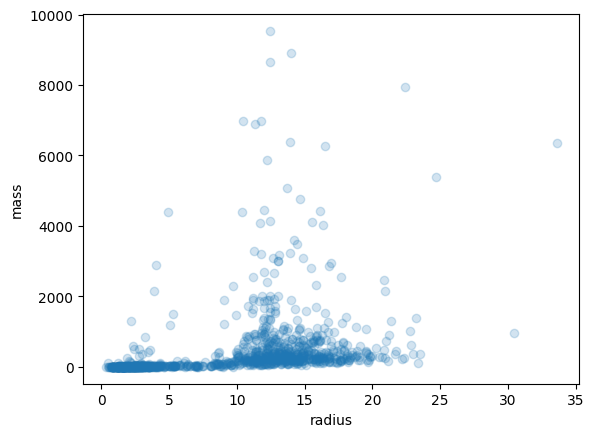

In [7]:
plt.scatter(data["pl_rade"], data["pl_bmasse"], alpha=0.2)
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

\newpage

Logarytm przy obu zmiennych

In [8]:
data["pl_rade"] = np.log(data["pl_rade"] + 1)
data["pl_bmasse"] = np.log(data["pl_bmasse"] + 1)

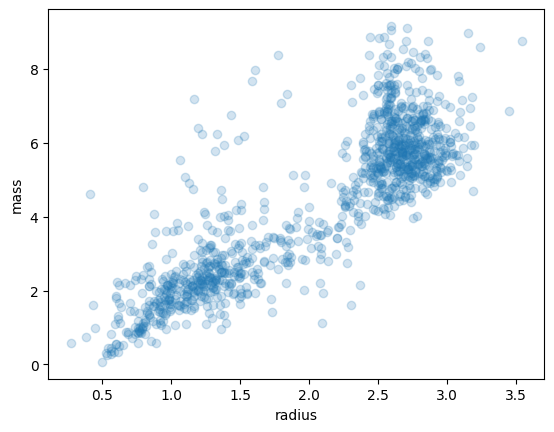

In [9]:
plt.scatter(data["pl_rade"], data["pl_bmasse"], alpha=0.2)
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

In [10]:
x_train = data[["pl_rade", "pl_bmasse"]].to_numpy()

\newpage

# Nowy wskaźnik

## większa siatka

- dla mnoznika h: [0.2, 0.4, ..., 10]
- dla r: [0.01, 0.02, ..., 0.5]

Najlepszy mnożnik h: 3.400, r: 0.02, Wskaźnik: 0.469


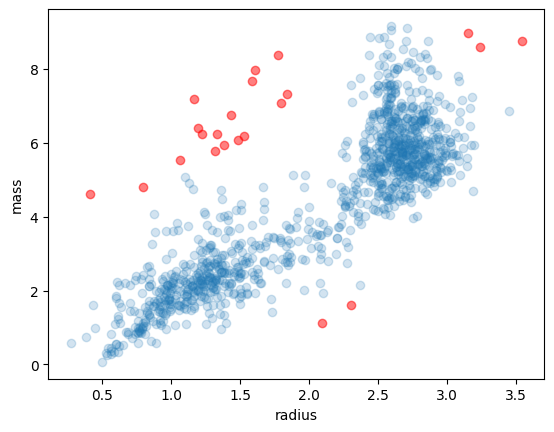

In [11]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 10.2, 0.2):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.scatter(data.loc[labels_pred==0, "pl_rade"], data.loc[labels_pred==0, "pl_bmasse"], alpha=0.2)
plt.scatter(data.loc[labels_pred==1, "pl_rade"], data.loc[labels_pred==1, "pl_bmasse"], alpha=0.5, c="red")
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

\newpage

## mniejsza siatka

- dla mnoznika h: [0.2, 0.4, ..., 5]
- dla r: [0.01, 0.02, ..., 0.2]

Najlepszy mnożnik h: 4.600, r: 0.01, Wskaźnik: 0.497


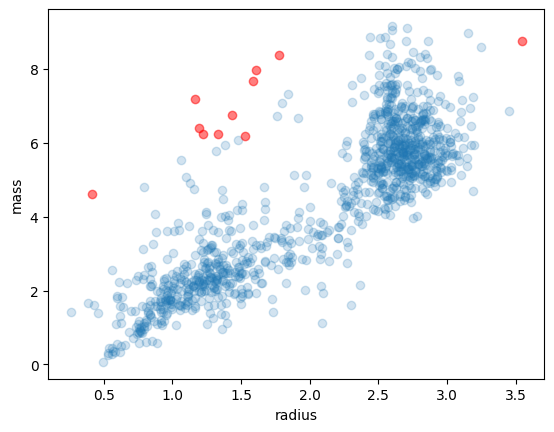

In [28]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.21, 0.01):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.scatter(data.loc[labels_pred==0, "pl_rade"], data.loc[labels_pred==0, "pl_bmasse"], alpha=0.2)
plt.scatter(data.loc[labels_pred==1, "pl_rade"], data.loc[labels_pred==1, "pl_bmasse"], alpha=0.5, c="red")
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

\newpage

# Stary/Pierwotny wskaźnik

## większa siatka

- dla mnoznika h: [0.2, 0.4, ..., 10]
- dla r: [0.01, 0.02, ..., 0.5]

Najlepszy mnożnik h: 0.800, r: 0.5, Wskaźnik: 0.291


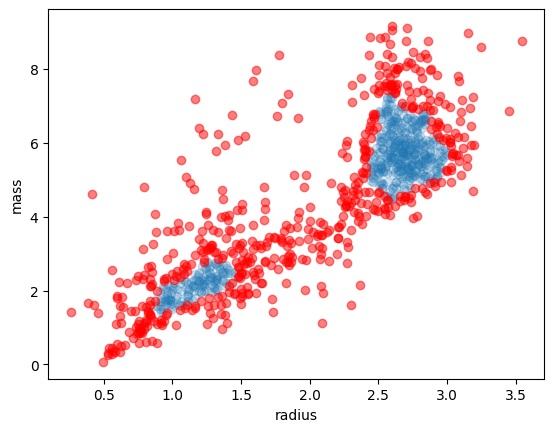

In [24]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 10.2, 0.2):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        scores_out = scores[outliers]
        scores_in = np.sort(scores[inliers])[:n_outliers]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#########
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.scatter(data.loc[labels_pred==0, "pl_rade"], data.loc[labels_pred==0, "pl_bmasse"], alpha=0.2)
plt.scatter(data.loc[labels_pred==1, "pl_rade"], data.loc[labels_pred==1, "pl_bmasse"], alpha=0.5, c="red")
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

\newpage

## mniejsza siatka

- dla mnoznika h: [0.2, 0.4, ..., 5]
- dla r: [0.01, 0.02, ..., 0.2]

Najlepszy mnożnik h: 2.600, r: 0.03, Wskaźnik: 0.305


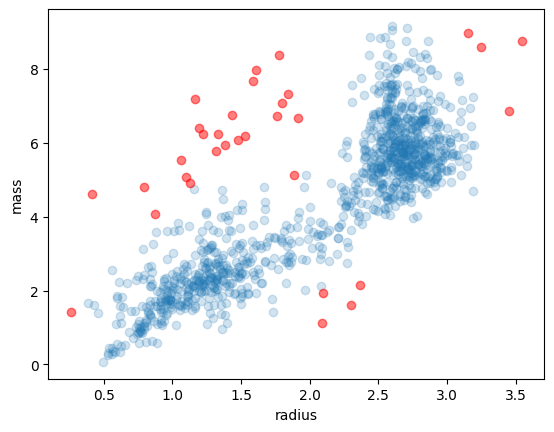

In [26]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.21, 0.01):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        scores_out = scores[outliers]
        scores_in = np.sort(scores[inliers])[:n_outliers]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#########
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.scatter(data.loc[labels_pred==0, "pl_rade"], data.loc[labels_pred==0, "pl_bmasse"], alpha=0.2)
plt.scatter(data.loc[labels_pred==1, "pl_rade"], data.loc[labels_pred==1, "pl_bmasse"], alpha=0.5, c="red")
plt.xlabel("radius")
plt.ylabel("mass")
plt.show()